### 引言

TA-Lib，全称“Technical Analysis Library”, 即技术分析库，是Python金融量化的高级库，涵盖了150多种股票、期货交易软件中常用的技术分析指标，如MACD、RSI、KDJ、动量指标、布林带等等。TA-Lib可分为10个子板块：Overlap Studies(重叠指标)，Momentum Indicators(动量指标)，Volume Indicators(交易量指标)，Cycle Indicators(周期指标)，Price Transform(价格变换)，Volatility Indicators(波动率指标)，Pattern Recognition(模式识别)，Statistic Functions(统计函数)，Math Transform(数学变换)和Math Operators(数学运算)，见下图。[【手把手教你】股市技术分析利器之TA-Lib（一）](https://mp.weixin.qq.com/s/nLOCNim0XRjqs_2iLDMO8Q)主要探讨了重叠指标的相关原理与Python实现，[【手把手教你】股市技术分析利器之TA-Lib（二）](https://mp.weixin.qq.com/s/L4TnfSclYEEqXOtVbhE3QA) 则着重介绍TA-Lib中强大的数学运算、数学变换、统计函数、价格变换、周期指标和波动率指标函数及其应用实例，本文延续该序列，探讨talib的其他指标及其运用。

### TA-Lib安装

安装：在cmd上使用“pip install talib”命令一般会报错，正确安装方法是，进入[下载地址](https://www.lfd.uci.edu/~gohlke/pythonlibs/) ，下拉选择，比如win系统64位，python3.7版本，选择TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl，将下载包放在当前工作路径中，然后在Anaconda Prompt（或windows的cmd）里面输入命令：pip install TA_Lib-0.4.17-cp27-cp27m-win_amd64.whl。  
使用：import talib as ta

In [1]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
#引入TA-Lib库
import talib as ta

In [29]:
#获取交易数据用于示例分析
import tushare as ts
def get_data(code,start='2018-01-01'):
    df=ts.get_k_data(code,start)
    df.index=pd.to_datetime(df.date)
    df=df.sort_index()
    return df

In [30]:
#获取上证指数收盘价、最高、最低价格
df=get_data('sh')[['open','close','high','low','volume']]
df.head()

,open,close,high,low,volume
date,,,,,
2018-01-02,3314.03,3348.33,3349.05,3314.03,202278860.0
2018-01-03,3347.74,3369.11,3379.92,3345.29,213836149.0
2018-01-04,3371.00,3385.71,3392.83,3365.30,206955288.0
2018-01-05,3386.46,3391.75,3402.07,3380.25,213060681.0
2018-01-08,3391.55,3409.48,3412.73,3384.56,236165106.0


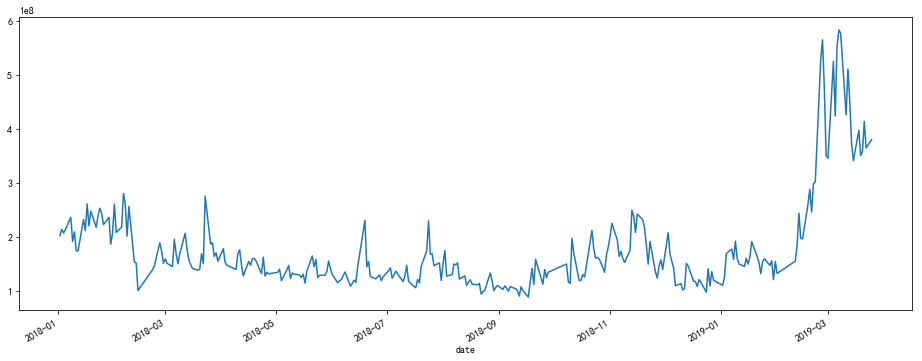

In [31]:
df.volume.plot(figsize=(16,6))

### Volume Indicators 成交量指标

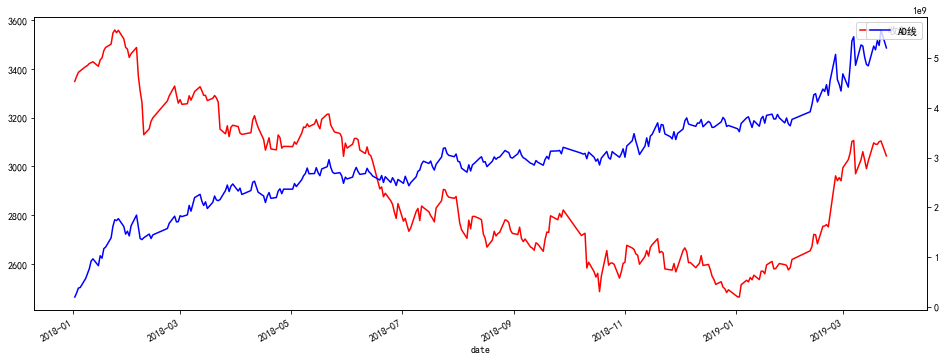

In [32]:
df['ad']=ta.AD(df.high, df.low, df.close, df.volume)
df['close'].plot(figsize=(16,6),label='收盘价',color='r')
plt.legend(loc=2)
df['ad'].plot(secondary_y=True,label='AD线',color='b')
plt.legend(loc=1)
plt.show()

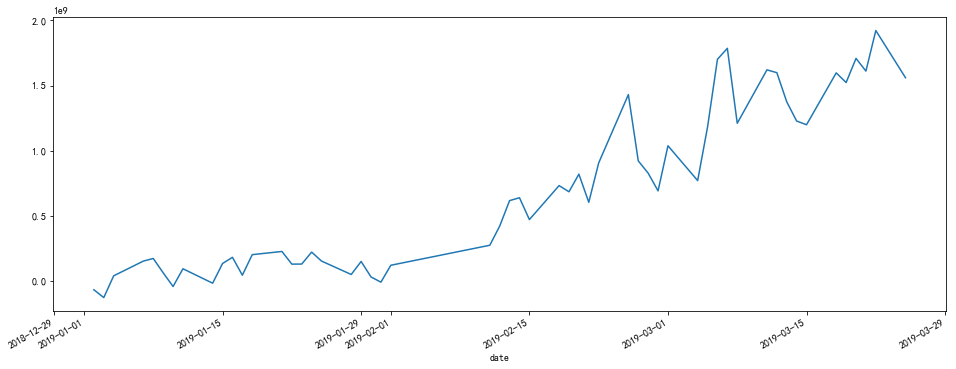

In [22]:
ta.AD(df.high, df.low, df.close, df.volume).plot(figsize=(16,6))

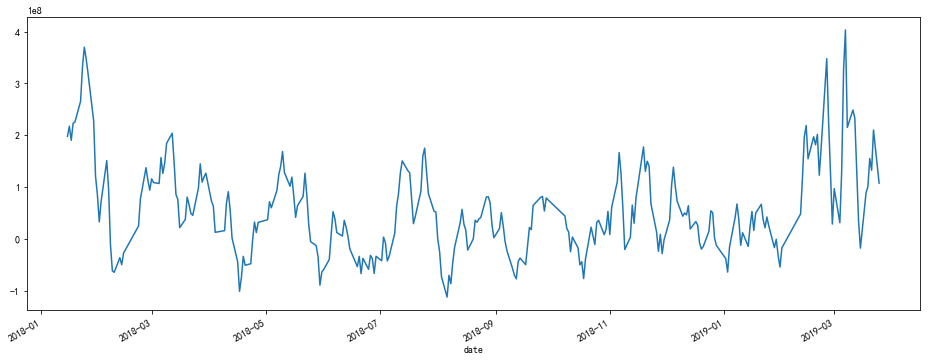

In [36]:
ta.ADOSC(df.high, df.low, df.close, df.volume, fastperiod=3, slowperiod=10).plot(figsize=(16,6))

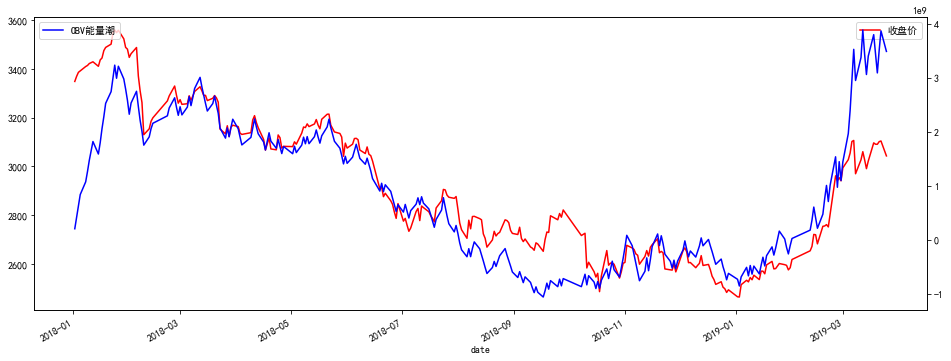

In [42]:
df['obv']=ta.OBV(df.close, df.volume)
df['close'].plot(figsize=(16,6),label='收盘价',color='r')
plt.legend(loc=1)
df['obv'].plot(secondary_y=True,label='OBV能量潮',color='b')
plt.legend(loc=2)
plt.show()